<a href="https://colab.research.google.com/github/Safhanafarha775/DataScience-Journey/blob/main/DS_Project3_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 : Importing Data

In [10]:
import pandas as pd
from google.colab import files

# Upload file
uploaded = files.upload()

df = pd.read_excel("Salary_Sheet.xlsx")


Saving Salary_Sheet.xlsx to Salary_Sheet.xlsx


Exploratory Data Analysis (EDA)

Step 1 : Basic Data Overview

In [11]:
#Preview first few rows
print(df.head())

   index SalaryUSD         Country JobTitle       PrimaryDatabase  \
0      1    200000   United States      DBA  Microsoft SQL Server   
1      2     61515  United Kingdom      DBA  Microsoft SQL Server   
2      3     95000         Germany    Other  Microsoft SQL Server   
3      4     56000  United Kingdom      DBA  Microsoft SQL Server   
4      5     35000          France      DBA  Microsoft SQL Server   

                    OtherDatabases  HoursWorkedPerWeek  \
0                    MySQL/MariaDB                45.0   
1               Oracle, PostgreSQL                35.0   
2  Oracle, MySQL/MariaDB, Informix                45.0   
3                              NaN                40.0   
4                           Oracle                40.0   

  EducationIsComputerRelated  
0                         No  
1                        NaN  
2                        Yes  
3                         No  
4                        Yes  


In [12]:
#Shape of Data set
print("Shape : ", df.shape)

Shape :  (6916, 8)


In [13]:
#Data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6916 entries, 0 to 6915
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       6916 non-null   int64  
 1   SalaryUSD                   6893 non-null   object 
 2   Country                     6893 non-null   object 
 3   JobTitle                    6893 non-null   object 
 4   PrimaryDatabase             6893 non-null   object 
 5   OtherDatabases              5520 non-null   object 
 6   HoursWorkedPerWeek          6893 non-null   float64
 7   EducationIsComputerRelated  5677 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 432.4+ KB
None


In [20]:
# Count missing values per column
print(df.isnull().sum())

# Percentage of missing values
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False).head(10))


index                            0
SalaryUSD                       23
Country                         23
JobTitle                        23
PrimaryDatabase                 23
OtherDatabases                1396
HoursWorkedPerWeek              23
EducationIsComputerRelated    1239
dtype: int64
OtherDatabases                20.185078
EducationIsComputerRelated    17.914980
SalaryUSD                      0.332562
Country                        0.332562
PrimaryDatabase                0.332562
JobTitle                       0.332562
HoursWorkedPerWeek             0.332562
index                          0.000000
dtype: float64


In [21]:
print(df.columns.tolist())

['index', 'SalaryUSD', 'Country', 'JobTitle', 'PrimaryDatabase', 'OtherDatabases', 'HoursWorkedPerWeek', 'EducationIsComputerRelated']


In [46]:
#Modying the datas in salary column
df['SalaryUSD'] = df['SalaryUSD'].str.replace(" ", ",")  #Replace commas, and spaces

Step 2 : Visualisation

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

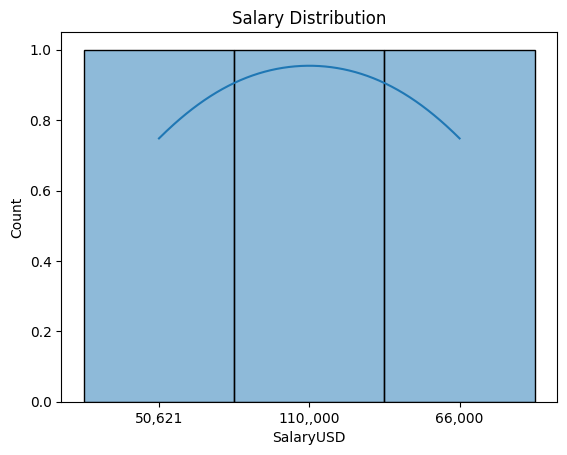

In [31]:
# Example: Salary distribution
sns.histplot(df['SalaryUSD'], bins=50, kde=True)  # replace with correct salary column name
plt.title("Salary Distribution")
plt.show()

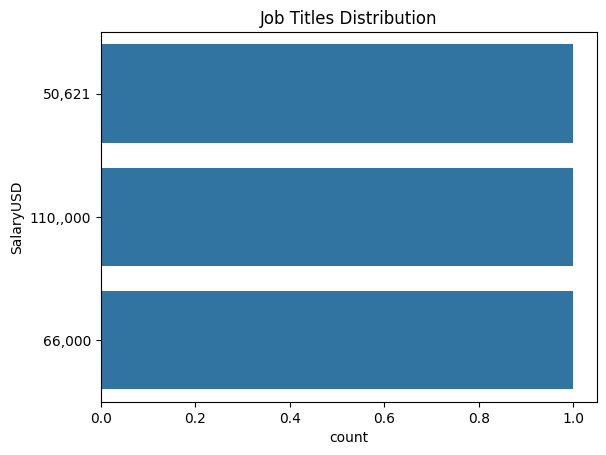

In [33]:
# Example: Count of job titles
sns.countplot(y=df['SalaryUSD'])  # replace with job title column
plt.title("Job Titles Distribution")
plt.show()

Step 3: Bivariate Analysis (Relationships Between Columns)

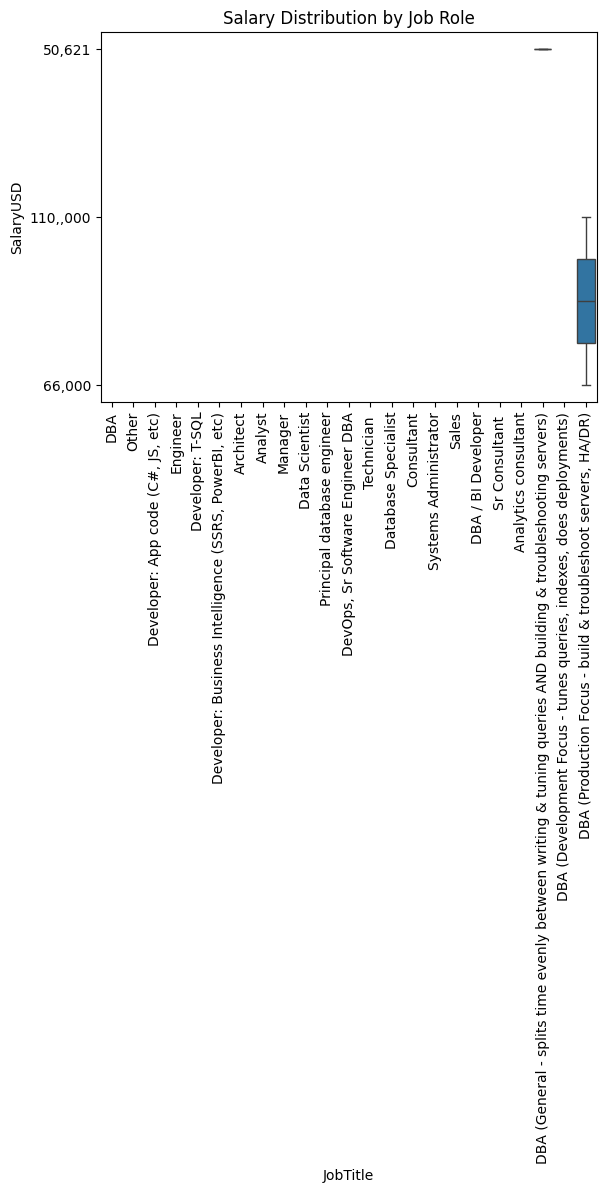

In [35]:
# Salary vs Job Role
sns.boxplot(x='JobTitle', y='SalaryUSD', data=df)  # job role vs salary
plt.xticks(rotation=90)
plt.title("Salary Distribution by Job Role")
plt.show()


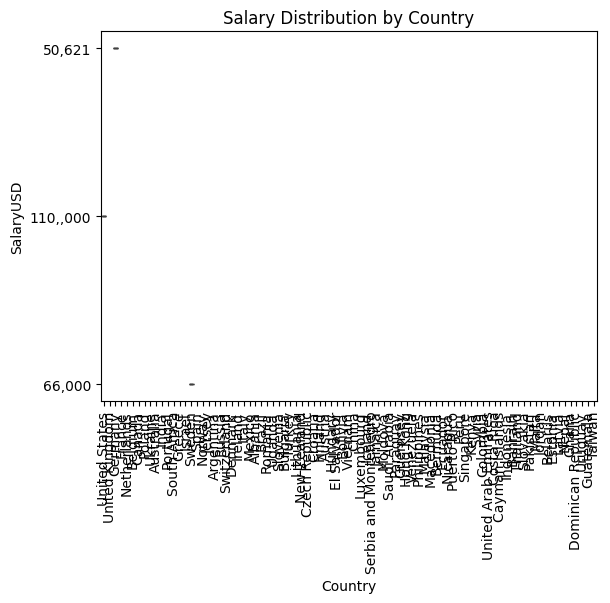

In [38]:
# Salary vs Country
sns.boxplot(x='Country', y='SalaryUSD', data=df)  # country vs salary
plt.xticks(rotation=90)
plt.title("Salary Distribution by Country")
plt.show()

Step 4: Correlation (Numerical Features)

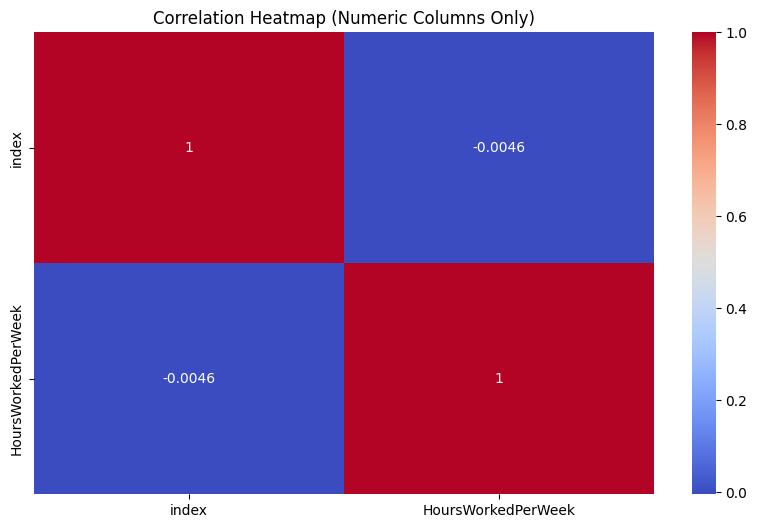

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

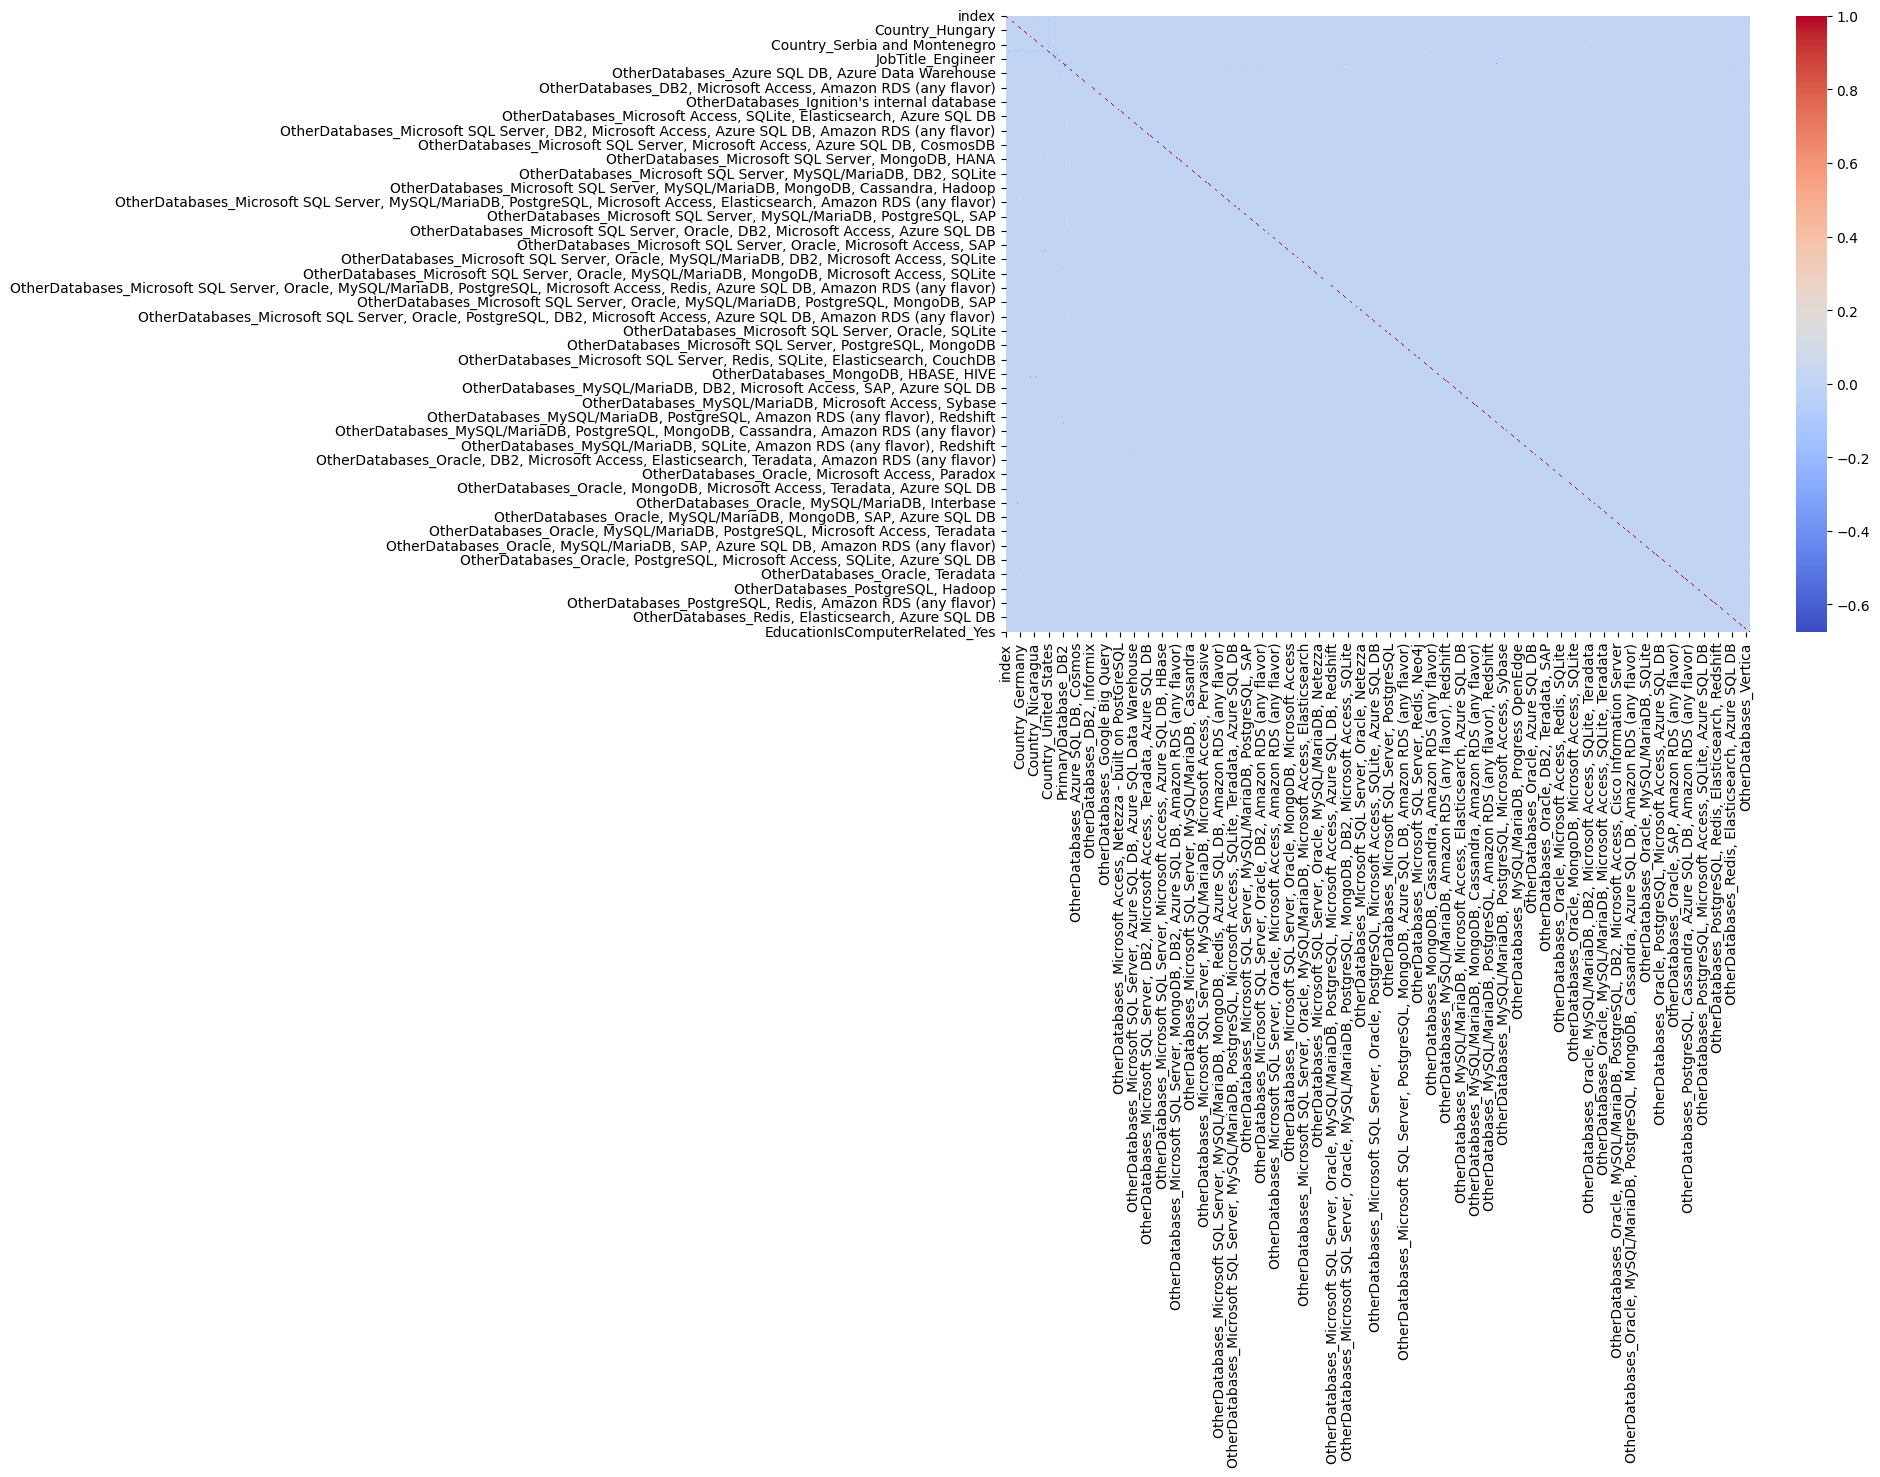

In [43]:
df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.show()


Force column "SalaryUSD" to string before cleaning then converting it into numeric

In [54]:
df['SalaryUSD'] = df['SalaryUSD'].astype(str)
df['SalaryUSD'] = df['SalaryUSD'].str.replace(r'[\$,]', '', regex=True)   # remove $ and commas
df['SalaryUSD'] = df['SalaryUSD'].str.replace(r'USD', '', regex=True)     # remove USD text
df['SalaryUSD'] = df['SalaryUSD'].str.strip()                             # remove leading/trailing spaces

In [56]:
df['SalaryUSD'] = pd.to_numeric(df['SalaryUSD'], errors='coerce')
df['HoursWorkedPerWeek'] = pd.to_numeric(df['HoursWorkedPerWeek'], errors='coerce')

In [57]:
correlation = df['SalaryUSD'].corr(df['HoursWorkedPerWeek'])
print("Correlation between Salary and Hours Worked Per Week:", correlation)

Correlation between Salary and Hours Worked Per Week: nan


In [58]:
df['HoursWorkedPerWeek'] = pd.to_numeric(df['HoursWorkedPerWeek'], errors='coerce')

correlation = df['SalaryUSD'].corr(df['HoursWorkedPerWeek'])
print("Correlation between Salary and Hours Worked Per Week:", correlation)


Correlation between Salary and Hours Worked Per Week: nan


In [59]:
print(df['SalaryUSD'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6911   NaN
6912   NaN
6913   NaN
6914   NaN
6915   NaN
Name: SalaryUSD, Length: 6916, dtype: float64
